# Methods To transform Data

In [1]:
import pandas as pd

In [3]:
happiness2015=pd.read_csv("happiness2015.csv")

In [4]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015=happiness2015.rename(mapping,axis=1)

## Convert numbers in Economy Column to categories that indicate whether the factor has a high impact on the happiness score or a low impact 

##### We can make it Using two Function in Pandas
### .map() method
### .apply() method


Apply a function element-wise to a columnWhen we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

In [5]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [46]:
#map() and apply() iterate through the Economy column and pass each value into the label function. 
#The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.
happiness2015['Economy Impact'] = economy_impact_map=happiness2015['Economy'].map(label)
happiness2015['Economy Impact 2'] = economy_impact_apply=happiness2015['Economy'].apply(label)
equal=economy_impact_map.equals(economy_impact_apply)


0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy Impact 2, Length: 158, dtype: object

## The difference between apply and map that 
#### map() function can't take argument as parameter to compare values with 
#### but Apply() can take it 

In [16]:
def label(element,x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label,x=0.8)

###  DataFrame.applymap() method that can apply functions element-wise to multiple columns at once 

In [45]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact=happiness2015[factors].applymap(label)


###### Note that : we can only use apply Method to transform multiple columns when we used pd.value_counts function operates on a series 
but If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns such happiness2015[factors].apply(label)

In [51]:
#Calculate the number of 'High' and 'Low' values in each column
factors_impact.apply(pd.value_counts)


,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


### Create a function that calculates the percentage of 'High' and 'Low' values in each column

In [20]:
def v_counts(col):
    num=col.value_counts()
    den=col.size
    return num/den
v_counts_pct=factors_impact.apply(v_counts)

In [21]:
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [25]:
def percentages(col):
    div = col/happiness2015['Happiness Score'] 
    return div * 100
factor_percentages = happiness2015[factors].apply(percentages)

In [26]:
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170
...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706


## Melt () Function to reshape data "unpivoting for data" tidy data Structure

In [43]:
# main _clos as multiple identifier for data 
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
# cols that changed to be rows "values & variables"
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
# apply melted function
melt=pd.melt(happiness2015,id_vars=main_cols,value_vars=factors)
#create new column to calculate percentage pf happiness score for every row value 
melt['Percentage']=round(melt['value']/melt['Happiness Score']*100,2)
melt

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


# Question : Which two factors, on average, contribute the most to the happiness score

####  Find the mean value of each Column, and plot the results to see how much each factor contributes to the happiness score on average


<AxesSubplot:ylabel='value'>

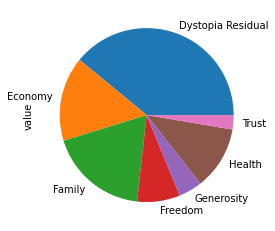

In [42]:
# using pivot table which index will be column and its value in values
pv_melt=melt.pivot_table(index='variable',values='value')
pv_melt.plot(kind='pie',y='value',legend=False)

## Answer: Economy And Family 